# Comparativa de los resultados de las velocidades de ejecución del programa

Esta libreta de Python muestra una lectura gráfica del archivo "data.csv", donde se comparan las distintas velocidades de ejecución del programa **image**.

Se comparan las siguientes pruebas:
- Promedio temporal (en microsegundos) de 50 ejecuciones del programa image, con la imagen img0.png, ejecutado en CPU (*ExecutionTimeCPU*).
- Promedio temporal (en microsegundos) de 50 ejecuciones del programa image, con la imagen img0.png, ejecutado en GPU con un solo bloque con un solo hilo, sin ningún tipo de optimización (*ExecutionTimeGPUDefault*).
- Promedio temporal (en microsegundos) de 50 ejecuciones del programa image, con la imagen img0.png, ejecutado en GPU, utilizando múltiples bloques, de tamaño 32x32 (*ExecutionTimeGPUMultithread*).
- Promedio temporal (en microsegundos) de 50 ejecuciones del programa image, con la imagen img0.png, ejecutado en GPU, con todas las optimizaciones hechas (memoria compartida, coalescencia, ejecución de streams, padding de matrices en memoria compartida, reducción masiva de llamadas a *cudaMalloc* y *cudaFree*) (*ExecutionTimeGPUOptimized*).

***NOTA***: Para poder ejecutar esta libreta de Python, es necesario tener un kernel de Python en el que estén instaladas las librerías numpy, pandas y matplotlib. Todos los datos están sacados después de ejecutar el código en un ordenador con un *Intel Core i7-10700K* y una tarjeta *NVIDIA GeForce RTX 3070*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, os.path
plt.rcParams['figure.figsize'] = [20, 10]

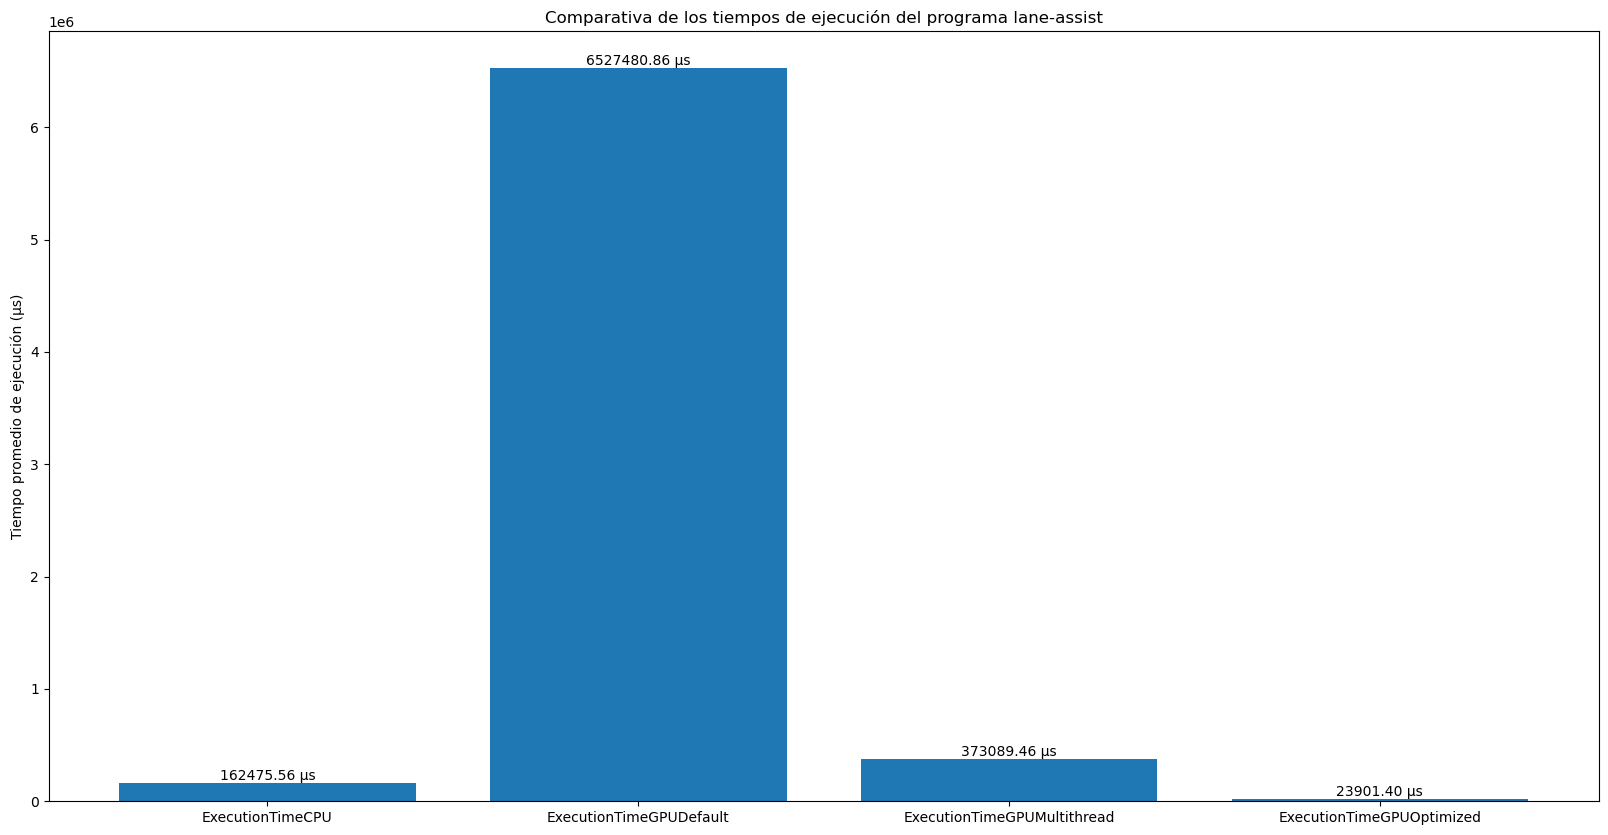

In [7]:
data = pd.read_csv("data.csv")

fig, ax = plt.subplots()

headers = list(data.columns.values)
values = list(data.mean(axis=0))

bars = ax.bar(headers, values)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f} µs', ha='center', va='bottom')

ax.set_ylabel("Tiempo promedio de ejecución (µs)")
ax.set_title("Comparativa de los tiempos de ejecución del programa lane-assist")

plt.show()